<a href="https://colab.research.google.com/github/tcalista/tcalista/blob/main/01_neural_networks_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to regression with neural networks in TensorFlow 

there are many definitions for a regression problem. predicting a numerical variable based on some other combination of variables, even shorter... predicting a number!


In [ ]:
# import tf
import tensorflow as tf
print(tf.__version__)

2.9.2


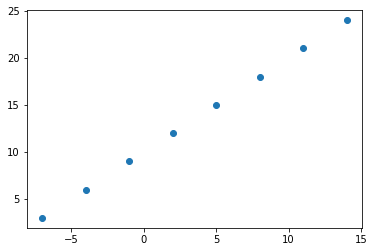

In [ ]:
# creating data to view and fit 
import numpy as np
import matplotlib.pyplot as plt

# create features (dependent variables)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create label (independent variables)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it 
plt.scatter(X, y)

input and ouput shapes

In [ ]:
# create a demo tensor for our housing price prediction problem 
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0].ndim　#scalar is a rank zero tensor 

SyntaxError: ignored

In [ ]:
X[0], y[0] # one x value to predict one y value

(-7.0, 3.0)

In [ ]:
# turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, plt.yticks

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <function matplotlib.pyplot.yticks(ticks=None, labels=None, **kwargs)>)

In [ ]:
input_shape = X[0].shape
output_shape= y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

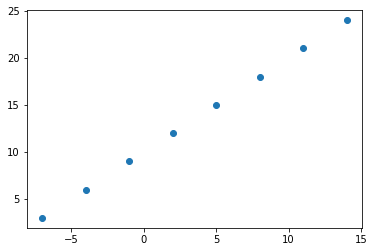

In [ ]:
plt.scatter(X, y)

## steps in modelling with TensorFlow
1. **creating a model** - define input and output layers, as well as the hidden layers of a deep learning model
2. **compile a model**- define the loss function (the function which tells our model how wrong the model is) and the optimizer (tells our model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model.)
3. **fitting a model** - letting the model to try to find patterns between X and y (features and labels)

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"]) #mae = mean absolute error # SGD = 
                                                    #stochastic gradient descent
# 3. fit the model
#model.fit(X, y, epochs=5), we need to expand the dimension of input data 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 565ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 207ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# same way using add method
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [ ]:
# check out X and y 
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# try and make a prediction using our model
y_pred = model.predict([17.0])

ValueError: ignored

In [ ]:
y_pred + 11 # still off!

## imporove our model
## improving our model
we can improve our model by altering the steps we took to create a model.

1. creating a model - here we might add more layers, increase the number of hidden u 
units (also called neurons within each of the hidden layers, or change the activation function of each
       layer)
2. compiling a model - here we might change the optimization function or perharps the learning rate of the optimization function.
3. fitting a model - here we might fit a model for more epochs or on more data ( give the model more examples )


In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"]) #mae = mean absolute error # SGD = 
                                                    #stochastic gradient descent
# 3. fit the model
#model.fit(X, y, epochs=5), we need to expand the dimension of input data 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 290ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
tf.random.set_seed(42)
# create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# fit the model ( this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # increasing epochs lower mae

Epoch 1/100
1/1 [==============================] - 0s 283ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 6m

In [ ]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# let's see if our model prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 63ms/step


array([[30.158512]], dtype=float32)

let's tweak the parameter again once 

In [ ]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 537ms/step - loss: 14.3099 - mae: 14.3099
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 14.2781 - mae: 14.2781
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 14.2469 - mae: 14.2469
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 14.2158 - mae: 14.2158
Epoch 5/10
1/1 [==============================] - 0s 15ms/step - loss: 14.1840 - mae: 14.1840
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 14.1522 - mae: 14.1522
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 14.1204 - mae: 14.1204
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 14.0885 - mae: 14.0885
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 14.0568 - mae: 14.0568
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 14.0250 - mae: 14.0250


In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 115ms/step


array([[-1.3610107]], dtype=float32)

In [ ]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 468ms/step - loss: 13.0174 - mae: 13.0174
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 12.9723 - mae: 12.9723
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 12.9271 - mae: 12.9271
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 12.8814 - mae: 12.8814
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 12.8340 - mae: 12.8340
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 12.7858 - mae: 12.7858
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 12.7374 - mae: 12.7374
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 12.6890 - mae: 12.6890
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 12.6405 - mae: 12.6405
Epoch 10/10
1/1 [==============================] - 0s 12ms/step - loss: 12.5920 - mae: 12.5920


## steps in improving a model part 2

In [ ]:
# let's see if we can make another change to imporove our model

# create the model with an extra hidden layer with 100 hidden units 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])
# compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 418ms/step - loss: 14.2190 - mae: 14.2190
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.5222 - mae: 13.5222
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8277 - mae: 12.8277
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.1351 - mae: 12.1351
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.4431 - mae: 11.4431
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7496 - mae: 10.7496
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0519 - mae: 10.0519
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.3466 - mae: 9.3466
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.6305 - mae: 8.6305
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.9001 - mae: 7.9001
Epoch 11/100
1/1 [==============================] - 0s 8ms/step

In [ ]:
# let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# make predicition
model.predict([17.0]) # see the result, overfitting!

1/1 [==============================] - 0s 62ms/step


array([[26.675219]], dtype=float32)

common ways to imporove a deep learning model:
1. adding layers
2. increase the number of hidden units
3. change the activation functions
4. change the optimization functions
5. change the learning rate (the most important hyperparameter)
6. fitting on more data
7. fitting for more epochs


## Evaluating a model's performance

in practice, a typical workflow you'll go through when building neural networks is:

build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it .....

when it comes to evaluation... there are 3 words you should memorize:
> "visualize, visualize, visualize!"

it's a good idea to visualize :
* the data - what data are we working with?
* the model itself - what does our model look like?
* the training of a model - how does a model perform while it learns?
* the predictions - how do the predictions of a model line up against the ground truth? 

In [ ]:
# make a bigger data set 
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

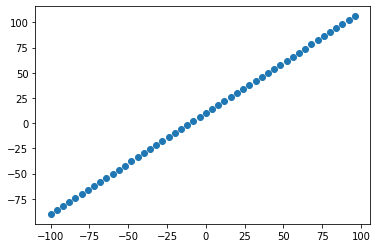

In [ ]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

the 3 sets

* **training set** - the model learns from this data, which is typically 70-80% of the total data you have available. 
* **validation set** - the model gets tuned of this data, which is typically 10-15% of the data
* **test set** - the model gets evaluated on this data to test what it has learned, which is typically 10-15% of the total data available. 

In [ ]:
## the 3 sets...
# check the lenght 
len(X) # pretty small, so no validation set in this case

50

In [ ]:
# split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80%)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20%0)
y_test = y[40:]

### visualizig the data 

Now we've got our data in training and test sets... let's visualize it

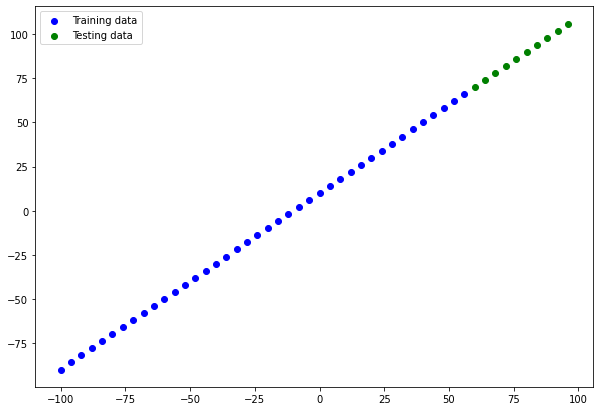

In [ ]:
plt.figure(figsize=(10, 7))
# plot training data in blue 
plt.scatter(X_train, y_train, c="b", label="Training data")
# plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# show a legend
plt.legend();

In [ ]:
# let's have a look at how to build a neural network for our data

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 21.5127 - mae: 21.5127
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 9.8784 - mae: 9.8784
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.3224 - mae: 11.3224
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5330 - mae: 9.5330
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.4384 - mae: 10.4384
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.6676 - mae: 9.6676
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.7680 - mae: 8.7680
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0557 - mae: 9.0557
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 19.2566 - mae: 19.2566
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3912 - mae: 10.3912
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - los

In [ ]:
# let's have a look at how to build a neural network for our data

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 18.9677 - mae: 18.9677
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 23.6366 - mae: 23.6366
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 28.8634 - mae: 28.8634
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 14.0354 - mae: 14.0354
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 19.1924 - mae: 19.1924
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.5803 - mae: 9.5803
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 10.5536 - mae: 10.5536
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 12.8684 - mae: 12.8684
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 33.8189 - mae: 33.8189
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 23.1392 - mae: 23.1392
Epoch 11/100
2/2 [==============================] - 0s 9ms/s

### visualizing the model

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* total parameters - total numbers of parameters in the model
* trainable parameters - these are the parameters (patterns) the model can update as it trains.
* non trainable parameters - these parameters arent updated during training (this is typical when you bring in already learn patterns or parameters from other models during transfer learning)


In [ ]:
# let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
# get a summary of our model
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


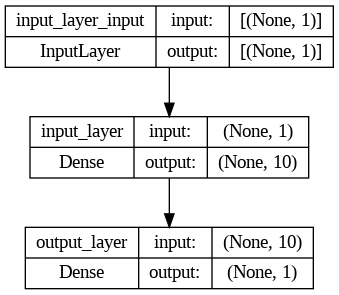

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## visualizing our model's prediction

to visualize predictions, it's a good idea to plot them against the ground truth labels.

often you'll see this is the form of 'y_test' or 'y_true' versus 'y_pred' (ground truth versus your model's predictions)

In [ ]:
# make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 54ms/step


array([[ 78.63336 ],
       [ 83.655914],
       [ 88.67847 ],
       [ 93.70102 ],
       [ 98.72357 ],
       [103.74612 ],
       [108.768654],
       [113.79121 ],
       [118.81376 ],
       [123.8363  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# let's create a plotting function 

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show the legend
  plt.legend();

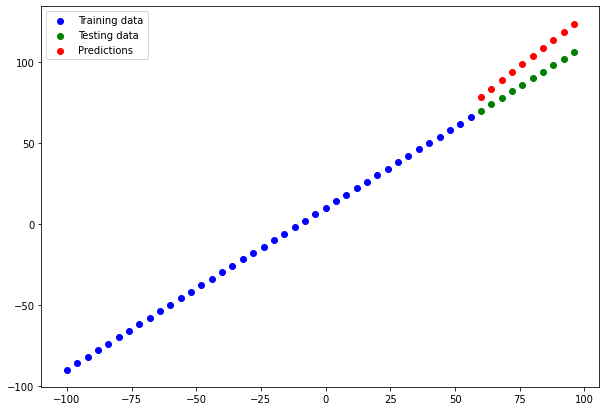

In [ ]:
plot_predictions()

### Evaluating our model's prediction with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model'S performance.

Since we're working on a regression problem, two of the main metrics:
* MAE - mean absolute error , "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errrors"

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 205ms/step - loss: 13.2348 - mae: 13.2348


[13.234832763671875, 13.234832763671875]

In [ ]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true= y_test, y_pred= tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.146655, 10.468817, 10.      , 10.740204, 12.834143, 16.196894,
       20.768654, 25.791204, 30.813757, 35.836304], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 78.63336 ],
       [ 83.655914],
       [ 88.67847 ],
       [ 93.70102 ],
       [ 98.72357 ],
       [103.74612 ],
       [108.768654],
       [113.79121 ],
       [118.81376 ],
       [123.8363  ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_test)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# calculate the maemae = tf.metrics.mean_absolute_error(y_true= y_test, y_pred= tf.constant(y_pred))
mae = tf.metrics.mean_absolute_error(y_true= y_test, y_pred= tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.234838>

In [ ]:
# calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred= tf.squeeze(y_pred))
mse